# IEX API Project

## Exploring stock data

### Import

In [138]:
#Did not end up using all of these in the final version, but ended up touching all of them in the process

from api_keys import stock_key
from api_keys import sandbox_key
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import time
from datetime import datetime
import math 
import statistics
from scipy import stats
from pprint import pprint 
import pyEX as p



### Making API Calls

#### Access the data for our 5 stock choices

#### API calls allotment was exhausted within minutes of the project starting so we switched to the sandbox version

In [126]:
#create a Client
# define symbol and time frame
#pull the columns and put in DF
c = p.Client(api_token= sandbox_key, version='sandbox')

def getdf(sym, timeframe = '2y'):
    return(c.chartDF(symbol=sym, timeframe=timeframe)[['close', 'open', 'high', 'low', 'symbol']])

    
XOM_df = getdf('XOM')   
HLT_df = getdf('HLT')
DIS_df = getdf('DIS')
DRI_df = getdf('DRI')
LUV_df = getdf('LUV')

DIS_df

,close,open,high,low,symbol
date,,,,,
2021-04-26,184.50,185.63,187.200,191.6500,DIS
2021-04-23,191.91,190.01,185.111,182.7500,DIS
2021-04-22,184.22,185.83,191.060,188.8128,DIS
2021-04-21,187.50,184.30,185.341,186.1900,DIS
2021-04-20,183.31,188.36,192.910,185.3300,DIS
...,...,...,...,...,...
2019-05-03,139.29,136.10,138.210,137.2800,DIS
2019-05-02,138.23,135.98,138.060,138.6500,DIS
2019-05-01,143.05,140.27,139.250,138.0790,DIS


### Combine all of the dataframes into one data frame 

#### Sort so that the oldest are first

In [127]:
# concat all the individual stock data frames into one
all_df = pd.concat([LUV_df, DRI_df, HLT_df, XOM_df, DIS_df], axis=0)
# sort oldest to newest
all_df = all_df.sort_index()
all_df

,close,open,high,low,symbol
date,,,,,
2019-04-29,140.80,145.86,147.010,140.11,DIS
2019-04-29,124.77,126.69,122.940,125.49,DRI
2019-04-29,87.99,92.24,89.510,90.67,HLT
2019-04-29,54.58,53.16,56.480,55.09,LUV
2019-04-29,81.18,80.79,84.350,82.92,XOM
...,...,...,...,...,...
2021-04-26,130.39,129.20,132.650,130.35,HLT
2021-04-26,56.68,57.94,59.008,55.95,XOM
2021-04-26,184.50,185.63,187.200,191.65,DIS


### Pull specific dates

#### We need three specific dates for each of the stocks for our comparison

#### Then separate the data for the stocks in separate dataframes for each date

In [128]:

# isolate the three specific days we are looking for from the individual stocks dataframes. This, along with other spots in the
#code I probably could have done as a function or a loop but with only 5 it was just as easy to do it this way
XOM_days_df = XOM_df.loc[['2020-01-02', '2020-03-16', '2021-03-16']]
DIS_days_df = DIS_df.loc[['2020-01-02', '2020-03-16', '2021-03-16']]
HLT_days_df = HLT_df.loc[['2020-01-02', '2020-03-16', '2021-03-16']]
LUV_days_df = LUV_df.loc[['2020-01-02', '2020-03-16', '2021-03-16']]
DRI_days_df = DRI_df.loc[['2020-01-02', '2020-03-16', '2021-03-16']]


#concat the dataframes we just got for the three days into one and sort them
three_dates_df = pd.concat([DRI_days_df, LUV_days_df, HLT_days_df, XOM_days_df, DIS_days_df], axis=0)
three_dates_df = three_dates_df.sort_index()
three_dates_df

#isolate them by date
Jan_2020 = three_dates_df.iloc[0:5]
March_2020 = three_dates_df.iloc[5:10]
March_2021 = three_dates_df.iloc[10:15]
March_2021

,close,open,high,low,symbol
date,,,,,
2021-03-16,145.37,144.29,148.07,144.8273,DRI
2021-03-16,62.77,65.27,64.00,62.8100,LUV
2021-03-16,128.86,127.82,132.34,129.7800,HLT
2021-03-16,61.85,60.07,61.95,59.1100,XOM
2021-03-16,195.38,201.70,204.99,195.2600,DIS


### Create a bar chart 

#### We want to see how the closing price of the stocks compare on each of the dates above. 

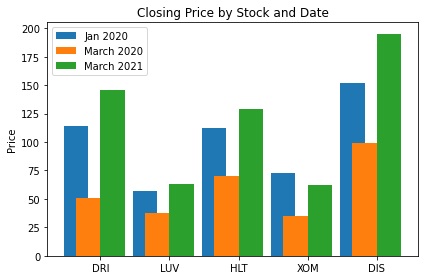

In [129]:
labels = three_dates_df["symbol"].unique()
twentytwenty = Jan_2020['close']
march_twentytwenty = March_2020['close']
march_twentytwentyone = March_2021['close']

x = np.arange(len(labels)) 
width = 0.35 

fig, ax = plt.subplots()
rects1 = ax.bar(x-width, twentytwenty, width, label='Jan 2020')
rects2 = ax.bar( x - width/2, march_twentytwenty, width, label='March 2020')
rects3 = ax.bar(x + width/2, march_twentytwentyone, width, label = 'March 2021')

ax.set_ylabel('Price')
ax.set_title('Closing Price by Stock and Date')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()



fig.tight_layout()

plt.show()

### Line graph

#### Line graph displaying the closing price of all 5 stocks in the last two years. It is annotated to show the three dates discussed in the big crash

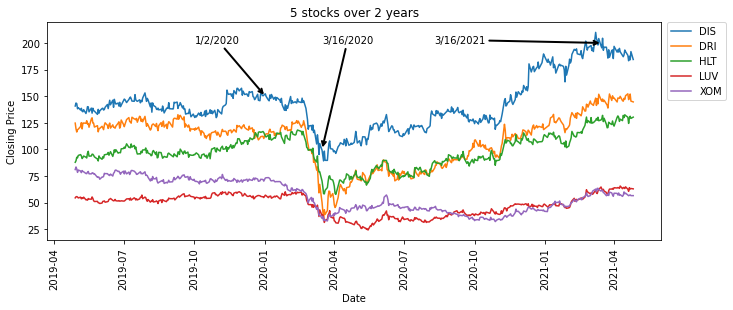

In [102]:
fig_dims = (11, 4)

fig, ax = plt.subplots(figsize=fig_dims)
g = sns.lineplot(x="date", 
                 y="close", 
                 data=all_df,
                 hue="symbol")

g.set_title('5 stocks over 2 years')
g.set(xlabel = 'Date', ylabel = 'Closing Price')
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)
plt.xticks(rotation = 90)
ax.annotate("1/2/2020", xy = (pd.Timestamp('2020-01-02'), 150), xytext = (pd.Timestamp('2019-10-02'), 200), 
             arrowprops = {'arrowstyle': '->','linewidth': 2, 'color': 'black'})
ax.annotate("3/16/2020", xy = (pd.Timestamp('2020-03-16'), 100), xytext = (pd.Timestamp('2020-03-16'), 200),
            arrowprops = {'arrowstyle': '->','linewidth': 2, 'color': 'black'})
ax.annotate("3/16/2021", xy = (pd.Timestamp('2021-03-16'), 200), xytext = (pd.Timestamp('2020-08-09'), 200), 
            arrowprops = {'arrowstyle': '->', 'linewidth': 2, 'color': 'black'})

plt.show()

### Second line graph

#### This is the same data as the previous graph, but each stock has it's own graph. 

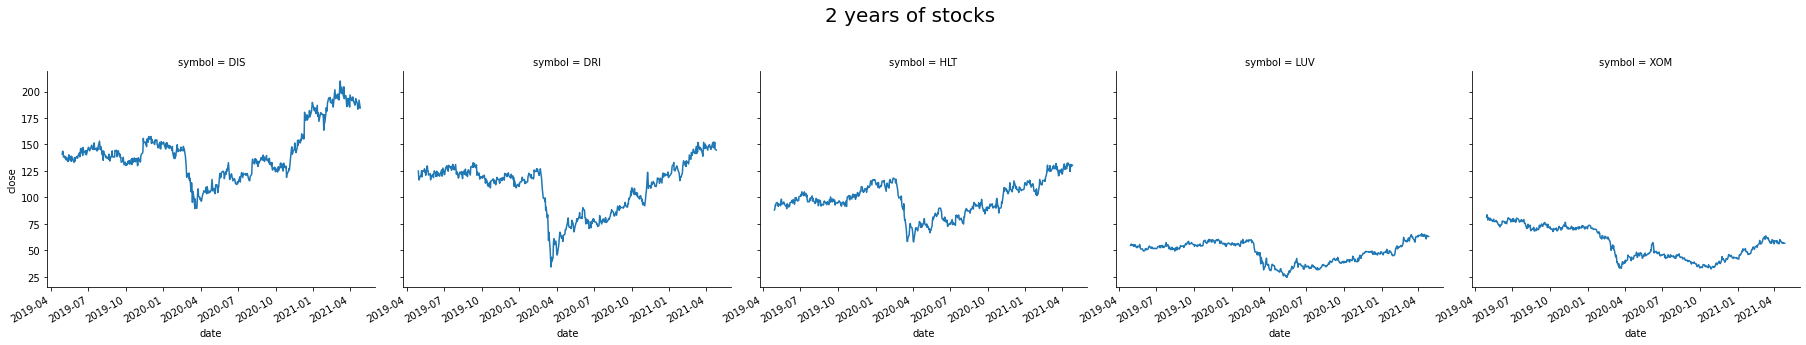

In [130]:
g= sns.relplot(x = 'date', y = 'close', data = all_df, kind = "line", col = 'symbol')
g.fig.autofmt_xdate()
g.fig.suptitle('2 years of stocks', fontsize=20)
g.fig.subplots_adjust(top=.8);
plt.show()

### Getting the 2019 mean and median

#### 2019 was before covid had a real impact in the stock price so it will be used as the comparison point

In [132]:
#sort  the df and then get the 2019 data. 
#hard coding the first date is probably not ideal since each day it is going to change (data only goes back 2 years),
#but for the sake of this project I'm going with it
DIS_df = DIS_df.sort_index()
DIS_2019_df = DIS_df.loc["2019-04-29":"2019-12-31"]

XOM_df = XOM_df.sort_index()
XOM_2019_df = XOM_df.loc["2019-04-29":"2019-12-31"]

DRI_df= DRI_df.sort_index()
DRI_2019_df = DRI_df.loc["2019-04-29":"2019-12-31"]

HLT_df = HLT_df.sort_index()
HLT_2019_df = HLT_df.loc["2019-04-29":"2019-12-31"]

LUV_df = LUV_df.sort_index()
LUV_2019_df = LUV_df.loc["2019-04-29":"2019-12-31"]

#get the mean for 2019 and round it to two decimal places
Xmean = round(XOM_2019_df['close'].mean(),2)
Dmean = round(DIS_2019_df['close'].mean(),2)
DRmean = round(DRI_2019_df['close'].mean(),2)
Hmean= round(HLT_2019_df['close'].mean(),2)
Lmean = round(LUV_2019_df['close'].mean(),2)


#get the median for 2019 
Xmedian = XOM_2019_df['close'].median()
Dmedian = DIS_2019_df['close'].median()
DRmedian = DRI_2019_df['close'].median()
Hmedian= HLT_2019_df['close'].median()
Lmedian= LUV_2019_df['close'].median()





### Create a bar chart 


##### Bar chart comparing 2019 mean, 2019 median, and current close price of stock. 

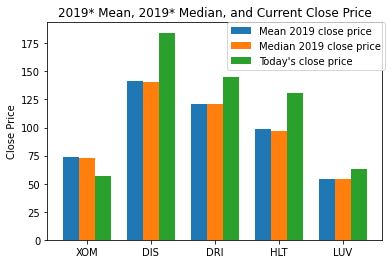

In [133]:

labels = ['XOM', 'DIS', 'DRI', 'HLT', 'LUV']
means = [Xmean, Dmean, DRmean, Hmean, Lmean]
medians = [ Xmedian, Dmedian, DRmedian, Hmedian, Lmedian]
current = [XOM_df.loc[('2021-04-26'),('close')], DIS_df.loc[('2021-04-26'),('close')],DRI_df.loc[('2021-04-26'),('close')], 
HLT_df.loc[('2021-04-26'),('close')], LUV_df.loc[('2021-04-26'),('close')]]

x = np.arange(5)  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x -.25, means, width, label='Mean 2019 close price')
rects2 = ax.bar(x, medians, width, label='Median 2019 close price')
rects3 = ax.bar(x+ .25, current, width, label="Today's close price")
ax.set_ylabel('Close Price')
ax.set_title('2019* Mean, 2019* Median, and Current Close Price')
ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)


plt.show()


### Percent change

#### Working on getting the percent change from 3/9/19 open to 3/9/19 close, 3/9/19 close to 3/12/19 close, and 3/12/19 close to 3/16/19 close

In [134]:
#Get the data points were are looking for



lo = LUV_df.loc[('2020-03-09'),('open')]
l9=LUV_df.loc[('2020-03-09'),('close')]
l12=LUV_df.loc[('2020-03-12'),('close')]
l16 =LUV_df.loc[('2020-03-16'),('close')]



xo = XOM_df.loc[('2020-03-09'),('open')]
x9=XOM_df.loc[('2020-03-09'),('close')]
x12 = XOM_df.loc[('2020-03-12'),('close')]
x16 = XOM_df.loc[('2020-03-16'),('close')]

ho = HLT_df.loc[('2020-03-09'),('open')]
h9 = HLT_df.loc[('2020-03-09'),('close')]
h12 = HLT_df.loc[('2020-03-12'),('close')]
h16 = HLT_df.loc[('2020-03-16'),('close')]

do = DIS_df.loc[('2020-03-09'),('open')]
d9 =DIS_df.loc[('2020-03-09'),('close')]
d12 =DIS_df.loc[('2020-03-12'),('close')]
d16 =DIS_df.loc[('2020-03-16'),('close')]

dro = DRI_df.loc[('2020-03-09'),('open')]
dr9 =DRI_df.loc[('2020-03-09'),('close')]
dr12 = DRI_df.loc[('2020-03-12'),('close')]
dr16 = DRI_df.loc[('2020-03-16'),('close')]

#put all the data points we gathered into a data frame

LUV_drop_df = pd.DataFrame({'LUV 3/9/20 open': [lo], 'LUV 3/9/20': [l9], 'LUV 3/12/20': [l12], 'LUV 3/16/20': [l16]} )
XOM_drop_df = pd.DataFrame({'XOM 3/9/20 open': [xo], 'XOM 3/9/20': [x9], 'XOM 3/12/20': [x12], 'XOM 3/16/20': [x16]} )
HLT_drop_df = pd.DataFrame({'HLT 3/9/20 open': [ho], 'HLT 3/9/20': [h9], 'HLT 3/12/20': [h12], 'HLT 3/16/20': [h16]} )
DIS_drop_df = pd.DataFrame({'DIS 3/9/20 open': [do], 'DIS 3/9/20': [d9], 'DIS 3/12/20': [d12], 'DIS 3/16/20': [d16]} )
DRI_drop_df = pd.DataFrame({'DRI 3/9/20 open': [dro], 'DRI 3/9/20': [dr9], 'DRI 3/12/20': [dr12], 'DRI 3/16/20': [dr16]} )




#do pct_change()
LUV_pct = LUV_drop_df.pct_change(axis = 'columns')
HLT_pct = HLT_drop_df.pct_change(axis = 'columns')
DIS_pct = DIS_drop_df.pct_change(axis = 'columns')

XOM_pct = XOM_drop_df.pct_change(axis = 'columns')

DRI_pct = DRI_drop_df.pct_change(axis = 'columns')
display(XOM_pct)
display(XOM_drop_df)

display(LUV_drop_df)
display(DIS_pct)
display(HLT_pct)

,XOM 3/9/20 open,XOM 3/9/20,XOM 3/12/20,XOM 3/16/20
0,NaN,0.015078,-0.121801,-0.079365


,XOM 3/9/20 open,XOM 3/9/20,XOM 3/12/20,XOM 3/16/20
0,43.11,43.76,38.43,35.38


,LUV 3/9/20 open,LUV 3/9/20,LUV 3/12/20,LUV 3/16/20
0,44.96,45.05,37.13,37.98


,DIS 3/9/20 open,DIS 3/9/20,DIS 3/12/20,DIS 3/16/20
0,NaN,-0.075198,-0.093866,0.042821


,HLT 3/9/20 open,HLT 3/9/20,HLT 3/12/20,HLT 3/16/20
0,NaN,0.031075,-0.10639,-0.107772


### Bar Graph

#### Bar Graph showing the percent change between the dates previously identified as "the crash"

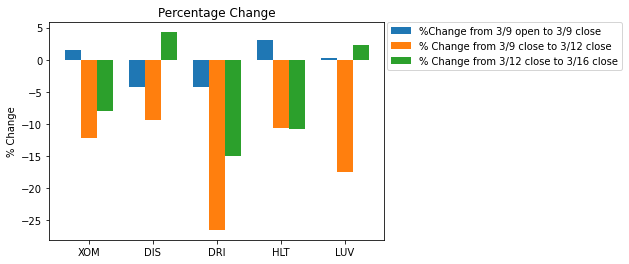

[1.5077708188355299,
 -4.295716150468721,
 -4.295716150468721,
 3.107476635514028,
 0.20017793594304667]

In [135]:
labels = ['XOM', 'DIS', 'DRI', 'HLT', 'LUV']
first = [float(XOM_pct['XOM 3/9/20']*100), float(DRI_pct['DRI 3/9/20']*100), float(DRI_pct['DRI 3/9/20']*100), float(HLT_pct['HLT 3/9/20']*100),
float(LUV_pct['LUV 3/9/20']*100)]
second =  [float(XOM_pct['XOM 3/12/20']*100), float(DIS_pct['DIS 3/12/20']*100), float(DRI_pct['DRI 3/12/20']*100),
float(HLT_pct['HLT 3/12/20']*100), float(LUV_pct['LUV 3/12/20']*100)]
third = [float(XOM_pct['XOM 3/16/20']*100),float(DIS_pct['DIS 3/16/20']*100),float(DRI_pct['DRI 3/16/20']*100),
float(HLT_pct['HLT 3/16/20']*100),float(LUV_pct['LUV 3/16/20']*100)]


x = np.arange(5)  
width = 0.25  

fig, ax = plt.subplots()
rects1 = ax.bar(x -.25, first, width, label='%Change from 3/9 open to 3/9 close')
rects2 = ax.bar(x, second, width, label='% Change from 3/9 close to 3/12 close')
rects3 = ax.bar(x+ .25, third, width, label="% Change from 3/12 close to 3/16 close")
ax.set_ylabel('% Change')
ax.set_title('Percentage Change')
ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)


plt.show()


first

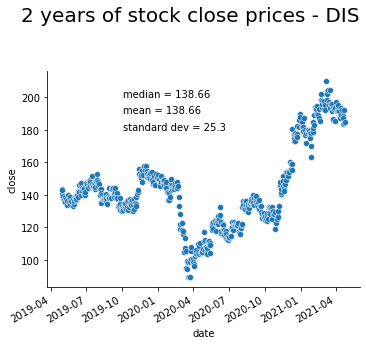

In [140]:
DIS_sd = round(statistics.stdev(DIS_df['close']),2)
DIS_df_mean = (round(DIS_df['close'].mean(),2))

DIS_df_median = DIS_df['close'].median()

g= sns.relplot(x = 'date', y = 'close', data = DIS_df, kind = "scatter")
g.fig.autofmt_xdate()
g.fig.suptitle('2 years of stock close prices - DIS', fontsize=20)
g.fig.subplots_adjust(top=.8)
plt.text('2019-10-04', 200, "median = "  + str(DIS_df_median),horizontalalignment='left', size='medium', color='black') 
plt.text('2019-10-04', 190, "mean = " + str(DIS_df_median) ,horizontalalignment='left', size='medium', color='black')
plt.text('2019-10-04', 180, "standard dev = " + str(DIS_sd),horizontalalignment='left', size='medium', color='black')


plt.show()

### Boxplot

#### Create a boxplot of the same data as above

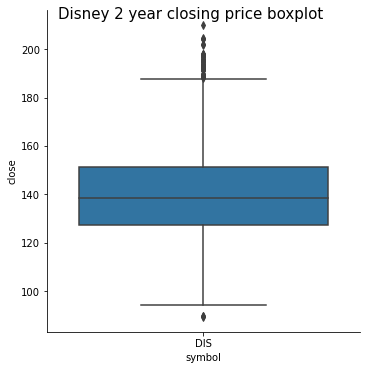

In [137]:
plot = sns.catplot(x="symbol", y="close",
            data=DIS_df,
            kind="box")
plot.fig.suptitle('Disney 2 year closing price boxplot', fontsize=15)

plt.show()

### Correlation

#### Look at the correlation between DIS and the other stocks

In [29]:
# get corrcoef() between DIS and the other stocks
#round to 4 decimal places
#print

to_LUV = np.corrcoef(DIS_df['close'], LUV_df['close'])
to_XOM = np.corrcoef(DIS_df['close'], XOM_df['close'])
to_DRI =np.corrcoef(DIS_df['close'], DRI_df['close'])
to_HLT = np.corrcoef(DIS_df['close'], HLT_df['close'])
LUV_cov = round(to_LUV[0,1], 4)
XOM_cov = round(to_XOM[0,1], 4)
DRI_cov = round(to_DRI[0,1], 4)
HLT_cov = round(to_HLT[0,1], 4)

print( 'The correlation between DIS and LUV is ' + str(LUV_cov))
print( 'The correlation between DIS and XOM is ' + str(XOM_cov))
print( 'The correlation between DIS and DRI is ' + str(DRI_cov))
print( 'The correlation between DIS and HLT is ' + str(HLT_cov))


The correlation between DIS and LUV is 0.675
The correlation between DIS and XOM is 0.2192
The correlation between DIS and DRI is 0.8301
The correlation between DIS and HLT is 0.9011


## Below here is all just sandbox stuff. It was all the code I played with to see if I wanted to use it

In [17]:
def med (df):
    return df[['close', 'open', 'high', 'low']].median()
     
def mean_calc (df):
    return df[['close', 'open', 'high', 'low']].mean()


med_2yr_df = pd.DataFrame({'LUV_median': med(LUV_df), 'HLT_median': med(HLT_df), 'DIS_median': med(DIS_df), 'XOM_median': med(XOM_df), 
              'DRI_median': med(DRI_df)})

mean_2yr_df = pd.DataFrame({'LUV_mean': round(mean_calc(LUV_df), 2), 'HLT_mean': round(mean_calc(HLT_df),2), 
                        'DIS_mean': round(mean_calc(DIS_df), 2), 
                        'XOM_mean': round(mean_calc(XOM_df), 2), 
              'DRI_mean': round(mean_calc(DRI_df), 2)})

display(med_2yr_df)
display(mean_2yr_df)


,LUV_median,HLT_median,DIS_median,XOM_median,DRI_median
close,50.87,96.71,138.76,56.04,117.04
open,51.27,96.26,139.02,55.30,117.30
high,51.51,98.04,140.41,57.09,117.88
low,50.54,95.40,137.64,54.50,115.54


,LUV_mean,HLT_mean,DIS_mean,XOM_mean,DRI_mean
close,48.05,98.09,142.88,56.68,108.90
open,48.10,97.94,142.84,56.73,108.91
high,48.87,99.44,144.45,57.43,110.52
low,47.31,96.60,141.12,56.07,107.19


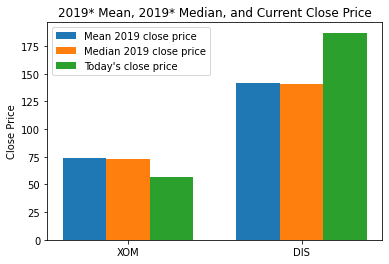

In [24]:

labels = ['XOM', 'DIS']
means = [Xmean, Dmean]
medians = [ Xmedian, Dmedian]
current = XOM_df.loc[('2021-04-23'),('close')], DIS_df.loc[('2021-04-23'),('close')]

x = np.arange(len(labels)) 
width = 0.25 

fig, ax = plt.subplots()
rects1 = ax.bar(x -.25, means, width, label='Mean 2019 close price')
rects2 = ax.bar(x, medians, width, label='Median 2019 close price')
rects3 = ax.bar(x+ .25, current, width, label="Today's close price")

ax.set_ylabel('Close Price')
ax.set_title('2019* Mean, 2019* Median, and Current Close Price')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

In [33]:
symbol = "tsla"
range = "2y"
request_url_template = 'https://sandbox.iexapis.com/v1/stock/{symbol}/chart/{range}?token={token}'
request_url = request_url_template.format(symbol = symbol, range = range, token = sandbox_key)
response = requests.get(request_url)
result = response.json()
result

[{'close': 48.456,
  'high': 49.999,
  'low': 47.809,
  'open': 47.5,
  'symbol': 'TSLA',
  'volume': 86148396,
  'id': 'ATOCSEICL_RIPHISR',
  'key': 'ASLT',
  'subkey': '0',
  'date': '2019-04-29',
  'updated': 1658412669188,
  'changeOverTime': 0,
  'marketChangeOverTime': 0,
  'uOpen': 244.9,
  'uClose': 248.77,
  'uHigh': 245.53,
  'uLow': 233.09,
  'uVolume': 17092940,
  'fOpen': 48.938,
  'fClose': 48.981,
  'fHigh': 50.561,
  'fLow': 46.493,
  'fVolume': 84483510,
  'label': 'Apr 29, 19',
  'change': 0,
  'changePercent': 0},
 {'close': 47.777,
  'high': 48.881,
  'low': 47.8,
  'open': 50.071,
  'symbol': 'TSLA',
  'volume': 47347666,
  'id': 'PAHIOCRLSEIS_CTIR',
  'key': 'STLA',
  'subkey': '0',
  'date': '2019-04-30',
  'updated': 1618650258663,
  'changeOverTime': -0.011798504726342772,
  'marketChangeOverTime': -0.011672680870825416,
  'uOpen': 245.5,
  'uClose': 245.94,
  'uHigh': 255.24,
  'uLow': 239,
  'uVolume': 9794649,
  'fOpen': 49.133,
  'fClose': 48.763,
  'fHigh'

In [40]:
##https://cloud.iexapis.com/stable/stock/FB/chart/date/20191107?token=stock_key
    

base_url = "https://sandbox.iexapis.com/stable/stock/"
additional_url=  "/chart/date/"
date1 = '20200102'
date2 = '20200316'
date3 = '20210316'
last_url = "?chartByDay=true&token="  + sandbox_key
symbol = 'AAPL'


a = base_url+ 'AAPL'+additional_url+date1+last_url
req = requests.get(base_url+ 'AAPL'+additional_url+date1+last_url).json()
t = requests.get(a)
print(a)
print(req)
print(t)

stock = ['XOM', 'DIS', 'DRI', 'LUV', 'HLT' ]
test = (base_url+ '{stock[0]}'+additional_url+date1+last_url)#json()



https://sandbox.iexapis.com/stable/stock/AAPL/chart/date/20200102?chartByDay=true&token=Tpk_89320140ee7b4dbdb48b492b3f689880
[{'close': 78.104, 'high': 75.26, 'low': 73.9092, 'open': 74.89, 'symbol': 'AAPL', 'volume': 140332022, 'id': 'IR_SCROICESILAHTP', 'key': 'LPAA', 'subkey': '0', 'date': '2020-01-02', 'updated': 1634682534885, 'changeOverTime': 0, 'marketChangeOverTime': 0, 'uOpen': 307.3, 'uClose': 301.75, 'uHigh': 307.5, 'uLow': 296.96, 'uVolume': 34612140, 'fOpen': 74.5733, 'fClose': 75.2496, 'fHigh': 74.8914, 'fLow': 74.8686, 'fVolume': 137211368, 'label': 'Jan 2, 20', 'change': 0, 'changePercent': 0}]
<Response [200]>


In [36]:
c.chartDF('AAPL').head()

,close,high,low,open,symbol,volume,id,key,subkey,updated,...,uLow,uVolume,fOpen,fClose,fHigh,fLow,fVolume,label,change,changePercent
date,,,,,,,,,,,,,,,,,,,,,
2021-04-26,140.80,135.69,138.3200,135.04,AAPL,68433513,HISAOTRICISL_RCEP,LAAP,0,2022-06-08 10:04:46.325,...,133.7600,68381615,139.85,137.00,137.07,137.5600,69307564,"Apr 26, 21",0.000000,0.0000
2021-04-23,140.19,136.84,138.4600,134.66,AAPL,80999629,_IPCSSEIIHALOCRRT,PAAL,0,2022-08-18 15:49:50.437,...,135.3000,80316319,138.31,137.26,136.69,134.8400,81417754,"Apr 23, 21",-0.400428,-0.0030
2021-04-22,134.87,136.89,134.0000,136.96,AAPL,86556001,HTSIL_CIIERPOCARS,APLA,0,2023-05-02 10:27:12.320,...,136.6500,86341625,139.40,133.39,136.48,133.0900,88588850,"Apr 22, 21",-2.421546,-0.0178
2021-04-21,135.70,134.73,134.5072,134.91,AAPL,70628922,COIICARSPIL_STHER,PLAA,0,2023-10-25 01:51:51.861,...,136.2193,71517453,132.71,134.60,139.82,133.8375,69777784,"Apr 21, 21",1.615727,0.0123
2021-04-20,137.71,138.10,131.8300,141.40,AAPL,97352663,EILASCRI_TCIHSPRO,APLA,0,2023-07-31 10:30:23.865,...,137.6500,96741384,135.93,135.19,139.69,134.5700,97412005,"Apr 20, 21",-0.400044,-0.0029


In [41]:
stock = ['XOM', 'DIS', 'DRI', 'LUV', 'HLT' ]
stock_data = []
#for  symbol in  stock:
 #   req = requests.get(base_url+ {symbol}+additional_url+date1+last_url).json()
  #  stock_data.append(req)
req = requests.get(base_url+ 'XOM'+additional_url+date1+last_url).json()
stock_data.append(req)
req = requests.get(base_url+ 'DIS'+additional_url+date1+last_url).json()
stock_data.append(req)
req = requests.get(base_url+ 'DRI'+additional_url+date1+last_url).json()
stock_data.append(req)
req = requests.get(base_url+ 'LUV'+additional_url+date1+last_url).json()
stock_data.append(req)
req = requests.get(base_url+ 'HLT'+additional_url+date1+last_url).json()
stock_data.append(req)
req = requests.get(base_url+ 'XOM'+additional_url+date2+last_url).json()
stock_data.append(req)
req = requests.get(base_url+ 'DIS'+additional_url+date2+last_url).json()
stock_data.append(req)
req = requests.get(base_url+ 'DRI'+additional_url+date2+last_url).json()
stock_data.append(req)
req = requests.get(base_url+ 'LUV'+additional_url+date2+last_url).json()
stock_data.append(req)
req = requests.get(base_url+ 'HLT'+additional_url+date2+last_url).json()
stock_data.append(req)
req = requests.get(base_url+ 'XOM'+additional_url+date3+last_url).json()
stock_data.append(req)
req = requests.get(base_url+ 'DIS'+additional_url+date3+last_url).json()
stock_data.append(req)
req = requests.get(base_url+ 'DRI'+additional_url+date3+last_url).json()
stock_data.append(req)
req = requests.get(base_url+ 'LUV'+additional_url+date3+last_url).json()
stock_data.append(req)
req = requests.get(base_url+ 'HLT'+additional_url+date3+last_url).json()
stock_data.append(req)

print(stock_data)
type(stock_data)

[[{'close': 72.2, 'high': 71.47, 'low': 70.3927, 'open': 72.05, 'symbol': 'XOM', 'volume': 12570861, 'id': 'OSIIPLCHRRCITSEA_', 'key': 'OMX', 'subkey': '0', 'date': '2020-01-02', 'updated': 1689978577184, 'changeOverTime': 0, 'marketChangeOverTime': 0, 'uOpen': 70.94, 'uClose': 72.1, 'uHigh': 74.05, 'uLow': 72.3366, 'uVolume': 12694934, 'fOpen': 65.4544, 'fClose': 65.5478, 'fHigh': 67.1836, 'fLow': 65.9134, 'fVolume': 12668125, 'label': 'Jan 2, 20', 'change': 0, 'changePercent': 0}], [{'close': 148.3, 'high': 148.9, 'low': 148.9, 'open': 148.43, 'symbol': 'DIS', 'volume': 9643633, 'id': 'REILICHRTS_OASCIP', 'key': 'SID', 'subkey': '0', 'date': '2020-01-02', 'updated': 1631457293816, 'changeOverTime': 0, 'marketChangeOverTime': 0, 'uOpen': 147.18, 'uClose': 152.4, 'uHigh': 153.1, 'uLow': 150.8, 'uVolume': 9836618, 'fOpen': 150.83, 'fClose': 154.2, 'fHigh': 149.2, 'fLow': 150.3, 'fVolume': 9677667, 'label': 'Jan 2, 20', 'change': 0, 'changePercent': 0}], [{'close': 114.2, 'high': 114.52,

list

In [38]:
# could not figure out why this doesn't work. It worked sometimes, then it seemed to stop working and
#I'm not sure what code I change
#that would have caused it. 

stock_dict = {'Symbol': [], 'Date': [], 'Label': [], 'High': [], 'Low': [], 'Open': [], 'Close': []}
for x in range(len(stock_data)):
    stock_dict['Symbol'].append(stock_data[x][0]['symbol'])
    stock_dict['Date'].append(stock_data[x][0]['date'])
    stock_dict['Label'].append(stock_data[x][0]['label'])
    stock_dict['High'].append(stock_data[x][0]['high'])
    stock_dict['Low'].append(stock_data[x][0]['low'])
    stock_dict['Open'].append(stock_data[x][0]['open'])
    stock_dict['Close'].append(stock_data[x][0]['close'])

print(stock_dict)
stock_df = pd.DataFrame(stock_dict)
display(stock_df)

TypeError: 'str' object is not callable

In [42]:
api_url = f'https://cloud.iexapis.com/stable/stock/AAPL/chart/max,chartByDay=true?token={stock_key}'
df = requests.get(api_url).json()
df

[{'close': 134.72,
  'high': 135.06,
  'low': 133.56,
  'open': 134.83,
  'symbol': 'AAPL',
  'volume': 66905069,
  'id': 'HISTORICAL_PRICES',
  'key': 'AAPL',
  'subkey': '',
  'date': '2021-04-26',
  'updated': 1619485201000,
  'changeOverTime': 0,
  'marketChangeOverTime': 0,
  'uOpen': 134.83,
  'uClose': 134.72,
  'uHigh': 135.06,
  'uLow': 133.56,
  'uVolume': 66905069,
  'fOpen': 134.83,
  'fClose': 134.72,
  'fHigh': 135.06,
  'fLow': 133.56,
  'fVolume': 66905069,
  'label': 'Apr 26, 21',
  'change': 0,
  'changePercent': 0}]